In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv('drive/MyDrive/titanic/train.csv')
test_df = pd.read_csv('drive/MyDrive/titanic/test.csv')

In [ ]:
data = [train_df,test_df]
for df in data:
    display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.drop(["Name","PassengerId","Sex","Embarked","Ticket","Cabin"],axis=1).corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


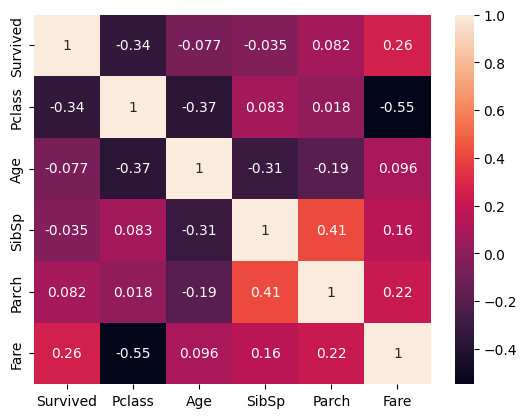

In [ ]:
sns.heatmap(train_df.drop(["Name","PassengerId","Sex","Embarked","Ticket","Cabin"],axis=1).corr(),annot=True)
plt.show()

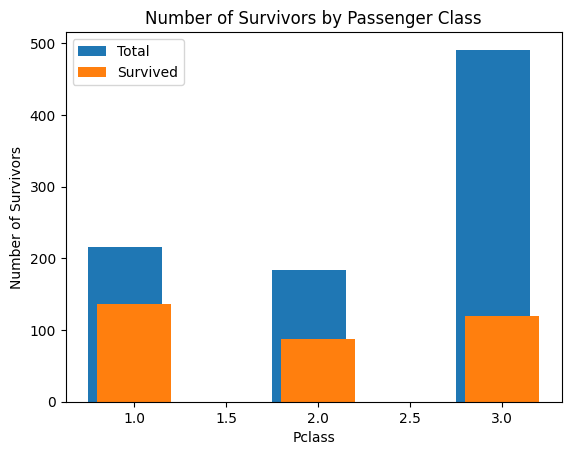

In [ ]:
survived_counts = train_df[train_df['Survived'] == 1].groupby('Pclass').size()
pclass_counts = train_df.groupby('Pclass').size()
plt.bar(pclass_counts.index-0.05, pclass_counts.values,width=0.4,label="Total")
plt.bar(survived_counts.index, survived_counts.values,width=0.4,label="Survived")
plt.xlabel("Pclass")
plt.ylabel("Number of Survivors")
plt.title("Number of Survivors by Passenger Class")
plt.legend()

# for index, value in enumerate(survived_counts.values):
#     plt.text(survived_counts.index[index], value, str(value), ha='center', va='bottom')

# plt.show()

<ipython-input-407-e0a92901ed39>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  pclass_plot = sns.barplot(x='Pclass', y='Survived', data=train_df, ci=None)


Text(0.5, 1.0, 'Survival Rate by Passenger Class')

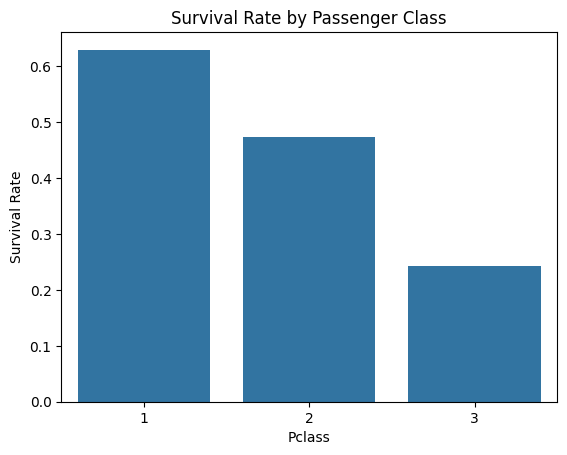

In [ ]:
pclass_plot = sns.barplot(x='Pclass', y='Survived', data=train_df, ci=None)
plt.xlabel("Pclass")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Passenger Class")

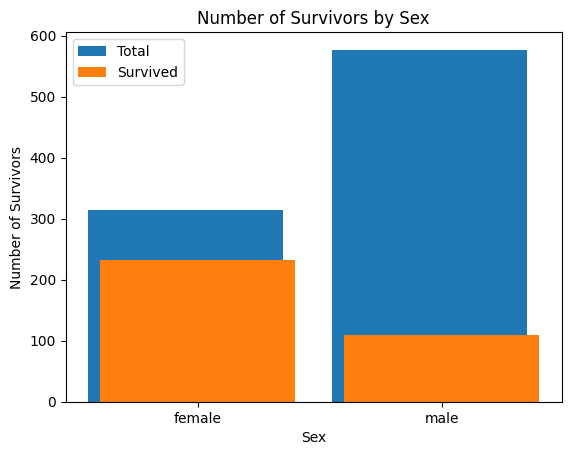

In [ ]:
survived_counts = train_df[train_df['Survived'] == 1].groupby('Sex').size()
sex_counts = train_df.groupby('Sex').size()
x_positions = range(len(sex_counts.index))
plt.bar([pos - 0.05 for pos in x_positions], sex_counts.values, width=0.8, label="Total")
plt.bar(survived_counts.index, survived_counts.values,width=0.8,label="Survived")
plt.xlabel("Sex")
plt.ylabel("Number of Survivors")
plt.title("Number of Survivors by Sex")
plt.legend()

<ipython-input-409-1ed80ba90185>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  gender_plot = sns.barplot(data=train_df, x='Sex', y='Survived', ci=None)


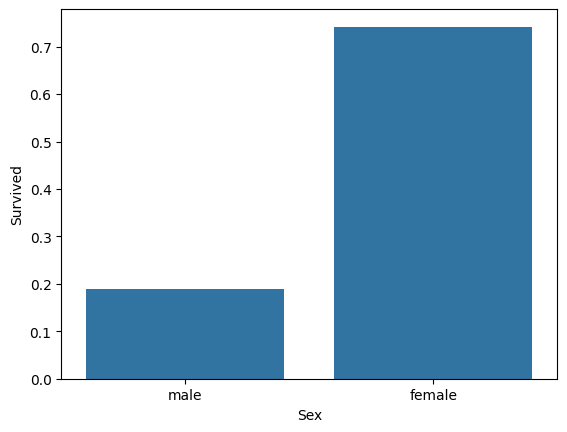

In [ ]:
gender_plot = sns.barplot(data=train_df, x='Sex', y='Survived', ci=None)

<ipython-input-410-a86f55940109>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  female_plot = sns.distplot(female[female['Survived'] == 1].Age.dropna(), bins=16, kde=True, label='survived', ax=axes[0])
<ipython-input-410-a86f55940109>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  male_plot = sns.distplot(male[male['

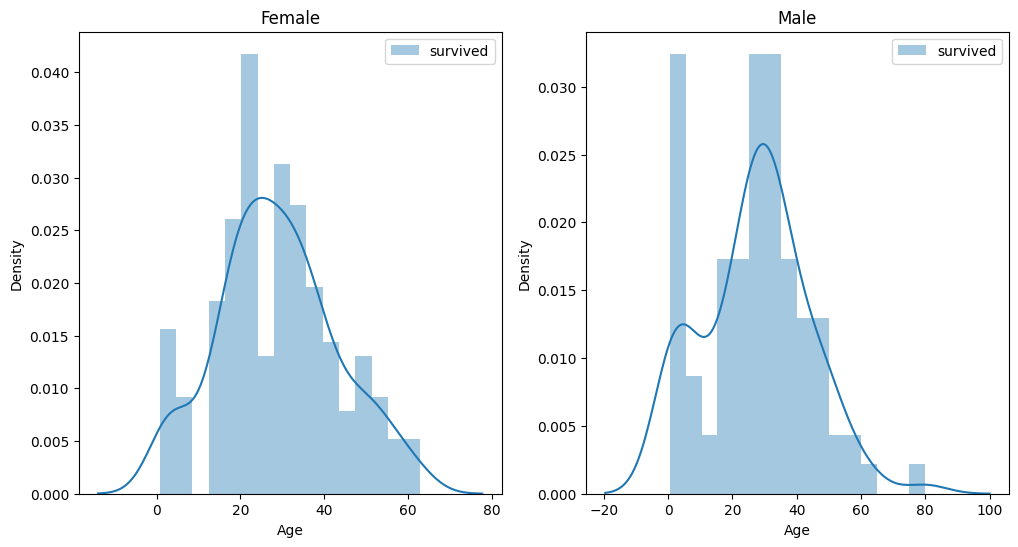

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[12,6])
female = train_df[train_df['Sex'] == 'female']
male = train_df[train_df['Sex'] == 'male']

female_plot = sns.distplot(female[female['Survived'] == 1].Age.dropna(), bins=16, kde=True, label='survived', ax=axes[0])
female_plot.set_title('Female')
female_plot.legend();

male_plot = sns.distplot(male[male['Survived'] == 1].Age.dropna(), bins=16, kde=True, label='survived', ax=axes[1])
male_plot.set_title('Male')
male_plot.legend();

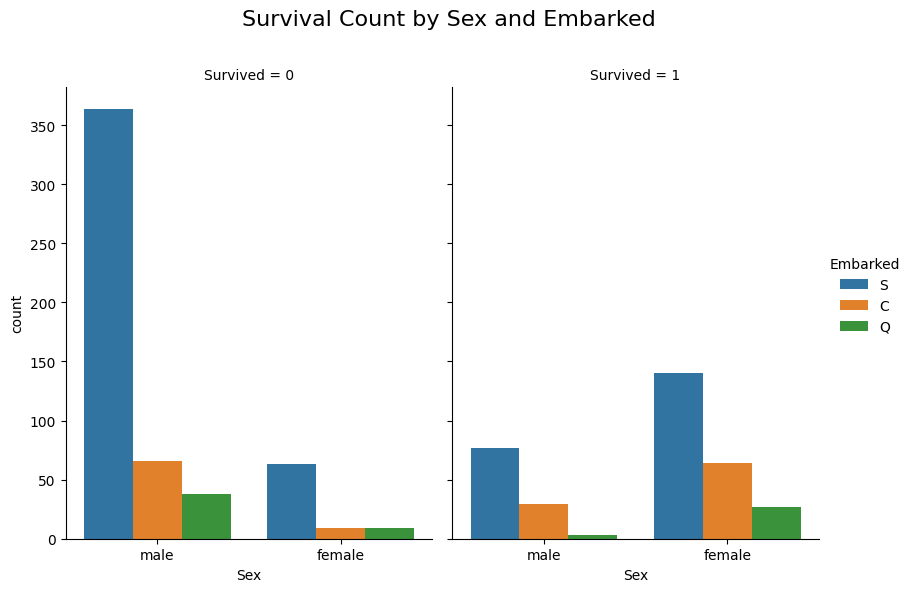

In [ ]:
sns.catplot(x='Sex', hue='Embarked', col='Survived', data=train_df, kind='count', height=6, aspect=.7)
plt.suptitle('Survival Count by Sex and Embarked', fontsize=16)
plt.subplots_adjust(top=0.85)
plt.show()


<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x7a852b001900>>

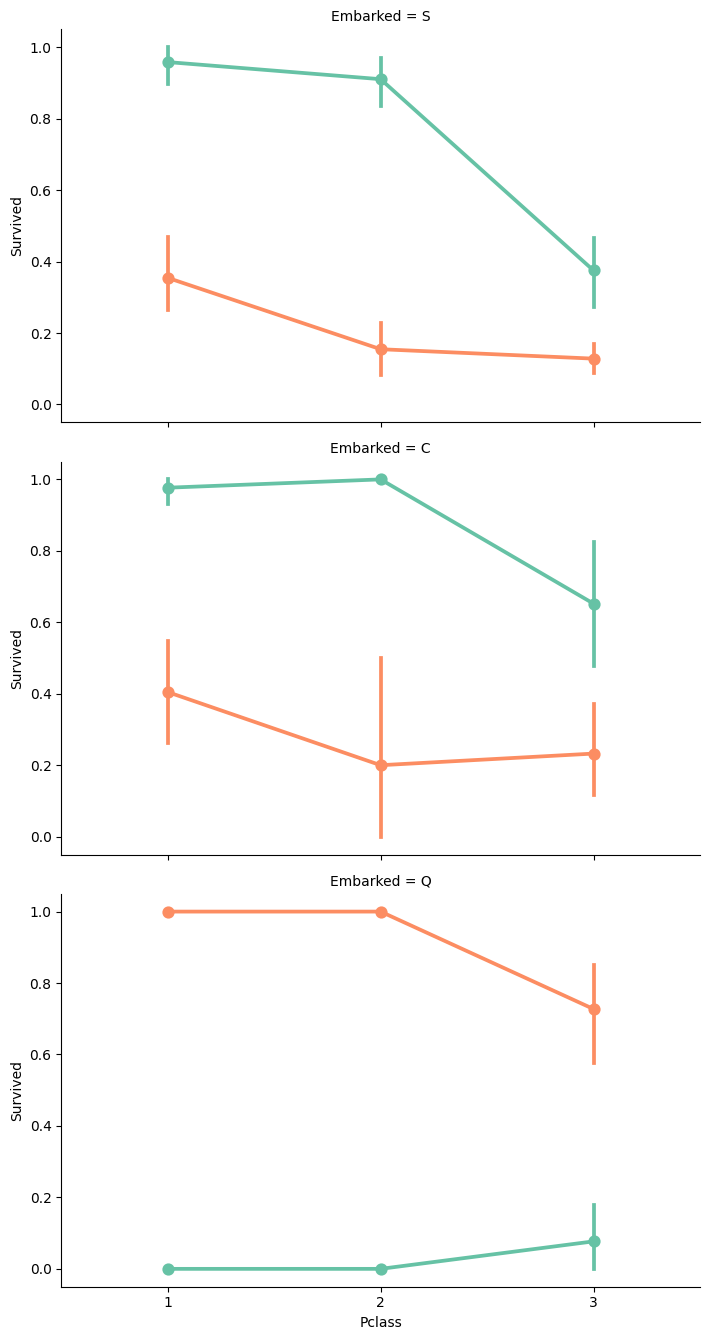

In [ ]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='Set2', order=None, hue_order=None)
FacetGrid.add_legend

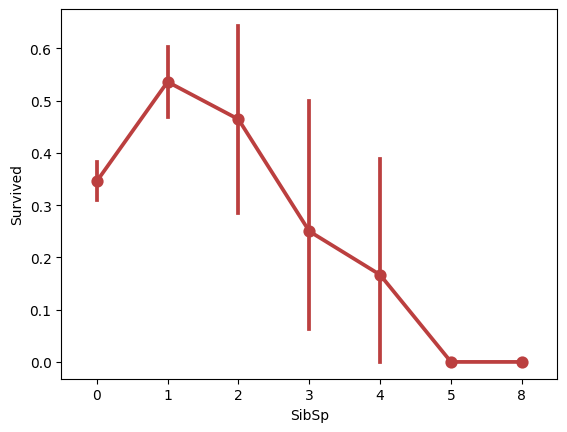

In [ ]:
sibplot= sns.pointplot(x='SibSp', y='Survived', data=train_df, color='#bb3f3f')

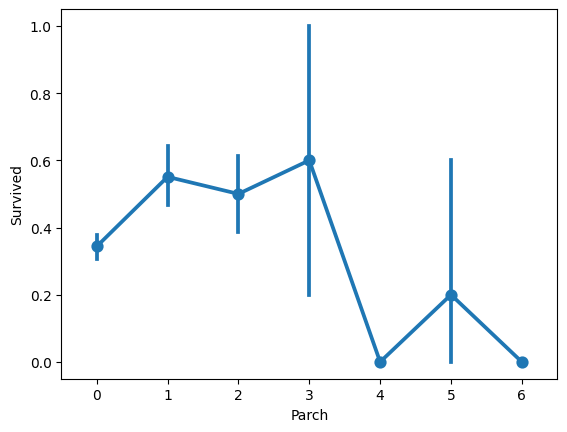

In [ ]:
sibplot= sns.pointplot(x='Parch', y='Survived', data=train_df)

In [ ]:
train_df.drop(columns=['PassengerId', 'Name'], inplace=True)
test_df.drop(columns=['Name'], inplace=True)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [ ]:
train_df.drop(columns=['Ticket'], inplace=True)
test_df.drop(columns=['Ticket'], inplace=True)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


<Axes: >

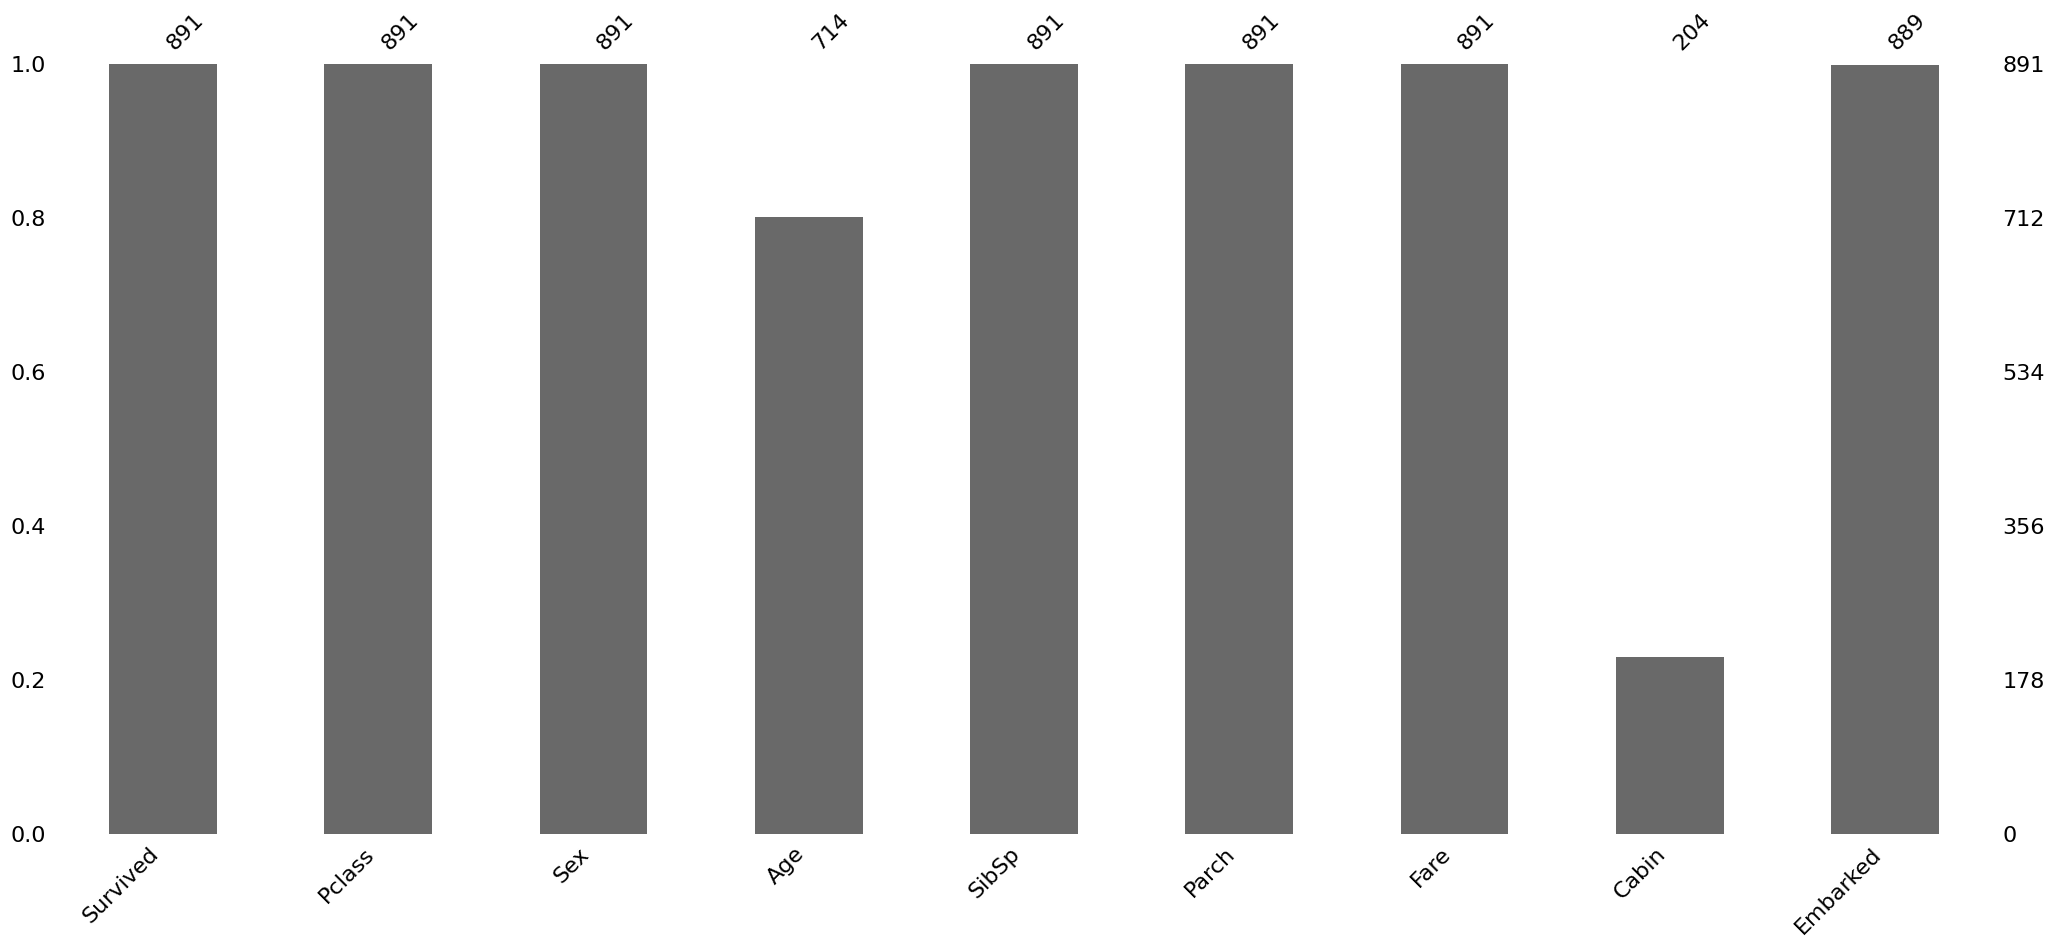

In [ ]:
import missingno as msno
msno.bar(train_df)

<Axes: >

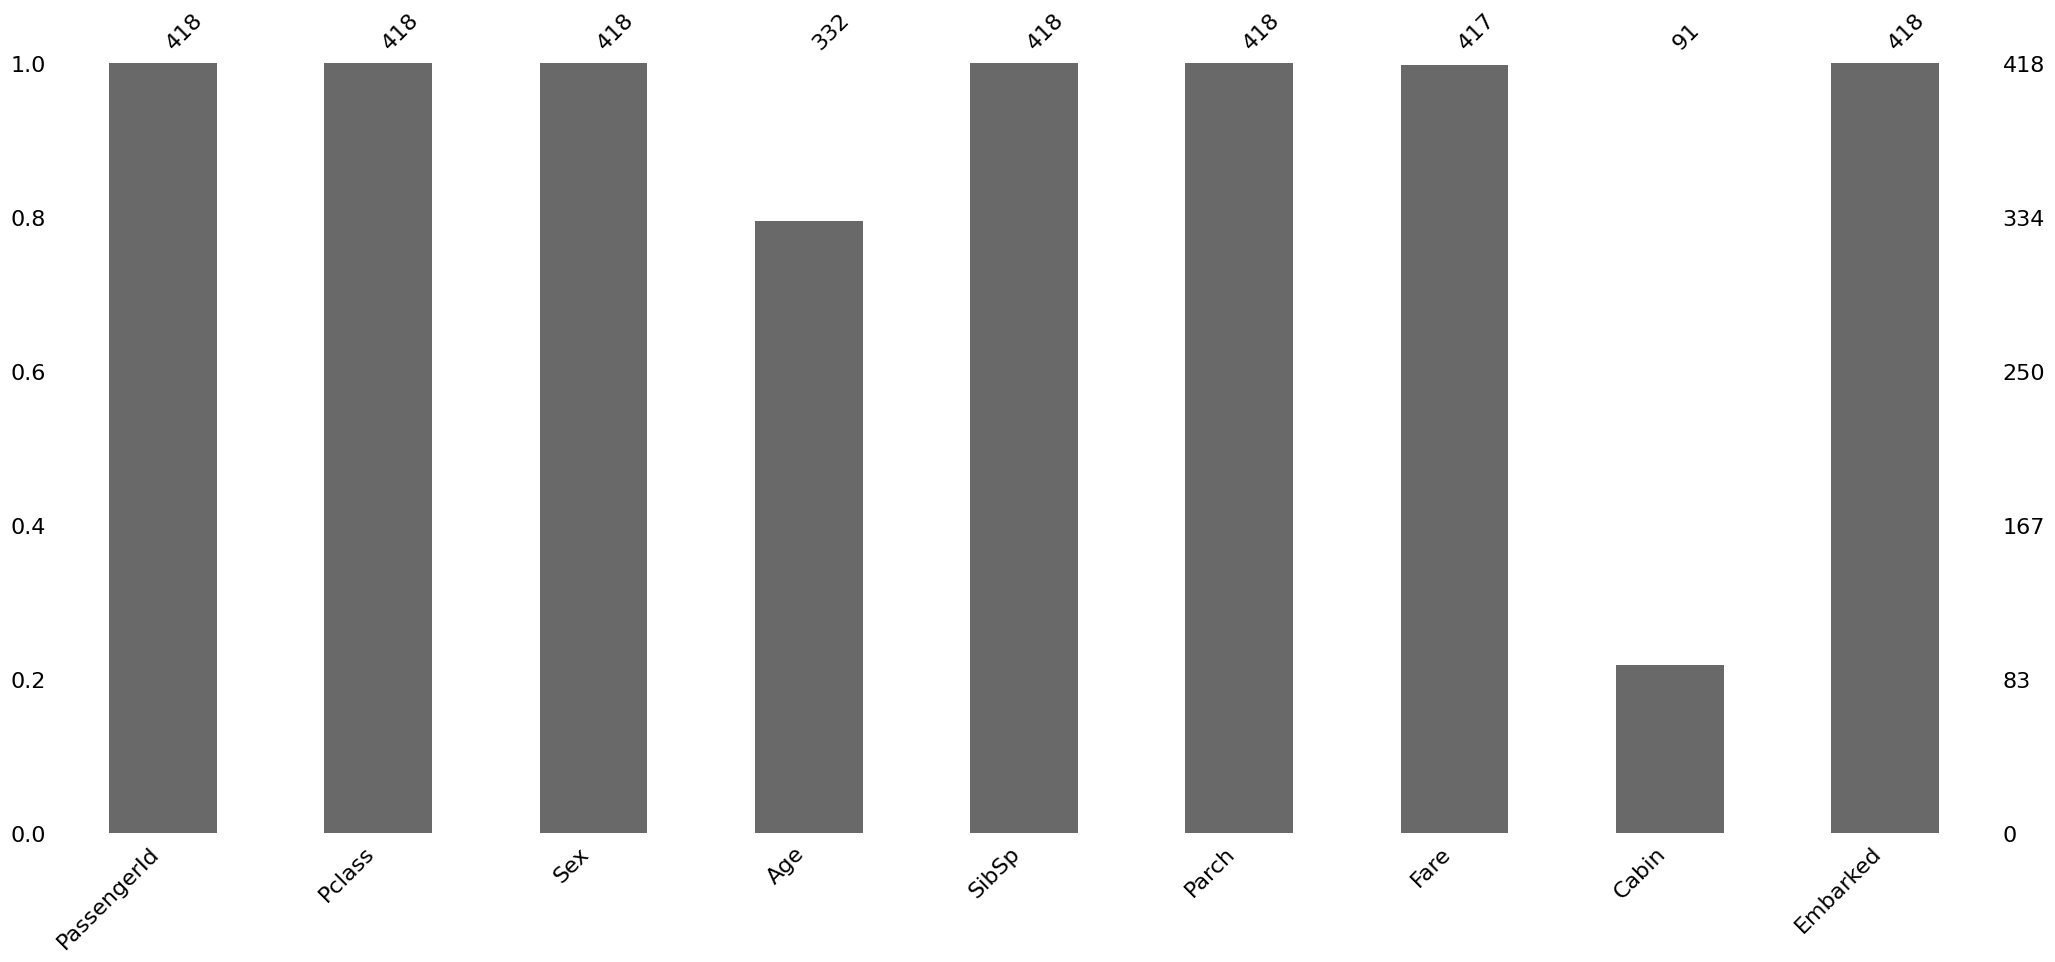

In [ ]:
msno.bar(test_df)

In [ ]:
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

In [ ]:
for dataset in data:
    display(dataset['Embarked'].describe())

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object

In [ ]:
train_df['Embarked'].fillna('S', inplace=True)

In [ ]:
for dataset in data:
    mean = dataset['Age'].mean()
    dataset['Age'] = dataset['Age'].fillna(mean)

In [ ]:
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
for dataset in data:
    dataset['Age'] = dataset['Age'].astype('int64')
    dataset['Fare'] = dataset['Fare'].astype('int64')

In [ ]:
X_train = train_df.iloc[:,1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
PassengerId = test_df['PassengerId']


One Hot Encoder

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder='passthrough')
X_train = np.array(ct.fit_transform(X_train))
X_test = np.array(ct.fit_transform(X_test))

In [ ]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X_train = np.array(ct.fit_transform(X_train))
X_test = np.array(ct.fit_transform(X_test))

In [ ]:

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction = log_reg.predict(X_test)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
result_df = pd.DataFrame({'PassengerId': PassengerId, 'Survived': prediction})
result_df.to_csv(f'OHE_submission.csv', index=False)

In [ ]:
log_reg.score(X_train, y_train)

0.8035914702581369

Frequency Encoder

In [ ]:
for dataset in data:
    display(dataset['Embarked'].value_counts(),dataset['Sex'].value_counts())


Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

Sex
male      577
female    314
Name: count, dtype: int64

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

Sex
male      266
female    152
Name: count, dtype: int64

In [ ]:
sex_frequency_dict = train_df['Sex'].value_counts().to_dict()
embarked_frequency_dict = train_df['Embarked'].value_counts().to_dict()


In [ ]:
train_df['Sex_Encoded'] = train_df['Sex'].map(sex_frequency_dict)
test_df['Sex_Encoded'] = test_df['Sex'].map(sex_frequency_dict)
train_df['Embarked_Encoded'] = train_df['Embarked'].map(embarked_frequency_dict)
test_df['Embarked_Encoded'] = test_df['Embarked'].map(embarked_frequency_dict)


In [ ]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Encoded,Embarked_Encoded
0,0,3,male,22,1,0,7,S,577,646
1,1,1,female,38,1,0,71,C,314,168
2,1,3,female,26,0,0,7,S,314,646
3,1,1,female,35,1,0,53,S,314,646
4,0,3,male,35,0,0,8,S,577,646
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13,S,577,646
887,1,1,female,19,0,0,30,S,314,646
888,0,3,female,29,1,2,23,S,314,646
889,1,1,male,26,0,0,30,C,577,168


In [ ]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Encoded,Embarked_Encoded
0,892,3,male,34,0,0,7,Q,577,77
1,893,3,female,47,1,0,7,S,314,646
2,894,2,male,62,0,0,9,Q,577,77
3,895,3,male,27,0,0,8,S,577,646
4,896,3,female,22,1,1,12,S,314,646
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,30,0,0,8,S,577,646
414,1306,1,female,39,0,0,108,C,314,168
415,1307,3,male,38,0,0,7,S,577,646
416,1308,3,male,30,0,0,8,S,577,646


In [ ]:
X_train_fe = train_df.drop(["Sex","Embarked"],axis=1).iloc[:,1:].values
y_train_fe = train_df.iloc[:, 0].values
X_test_fe = test_df.drop(["Sex","Embarked"],axis=1).iloc[:, 1:].values
train_df.drop(["Sex_Encoded","Embarked_Encoded"],axis=1,inplace=True)
test_df.drop(["Sex_Encoded","Embarked_Encoded"],axis=1,inplace=True)



In [ ]:
reg_fe = LogisticRegression()
reg_fe.fit(X_train_fe, y_train_fe)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction = reg_fe.predict(X_test_fe)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
result_df = pd.DataFrame({'PassengerId': PassengerId, 'Survived': prediction})
result_df.to_csv(f'FE_submission.csv', index=False)

In [ ]:
reg_fe.score(X_train_fe, y_train_fe)

0.7957351290684624

Ordinal Encoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
X_train_oe = train_df.iloc[:,1:]
X_test_oe = test_df.iloc[:, 1:]

In [ ]:
enc = OrdinalEncoder()
X_train_oe[["Sex","Embarked"]] = enc.fit_transform(X_train_oe[["Sex","Embarked"]])
X_test_oe[["Sex","Embarked"]] = enc.fit_transform(X_test_oe[["Sex","Embarked"]])

In [ ]:
reg_oe = LogisticRegression()
reg_oe.fit(X_train_oe, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction = reg_oe.predict(X_test_oe)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
result_df = pd.DataFrame({'PassengerId': PassengerId, 'Survived': prediction})
result_df.to_csv(f'OE_submission.csv', index=False)

In [ ]:
reg_oe.score(X_train_oe, y_train)

0.8024691358024691

In [ ]:
from sklearn.feature_extraction import FeatureHasher

In [ ]:
X_train_fh = train_df.iloc[:,1:]
y_train_fh = train_df.iloc[:, 0]
X_test_fh = test_df.iloc[:, 1:]


In [ ]:
X_train_fh_dict = X_train_fh.to_dict(orient='records')
X_test_fh_dict = X_test_fh.to_dict(orient='records')
X_train_fh_dict

[{'Pclass': 3,
  'Sex': 'male',
  'Age': 22,
  'SibSp': 1,
  'Parch': 0,
  'Fare': 7,
  'Embarked': 'S'},
 {'Pclass': 1,
  'Sex': 'female',
  'Age': 38,
  'SibSp': 1,
  'Parch': 0,
  'Fare': 71,
  'Embarked': 'C'},
 {'Pclass': 3,
  'Sex': 'female',
  'Age': 26,
  'SibSp': 0,
  'Parch': 0,
  'Fare': 7,
  'Embarked': 'S'},
 {'Pclass': 1,
  'Sex': 'female',
  'Age': 35,
  'SibSp': 1,
  'Parch': 0,
  'Fare': 53,
  'Embarked': 'S'},
 {'Pclass': 3,
  'Sex': 'male',
  'Age': 35,
  'SibSp': 0,
  'Parch': 0,
  'Fare': 8,
  'Embarked': 'S'},
 {'Pclass': 3,
  'Sex': 'male',
  'Age': 29,
  'SibSp': 0,
  'Parch': 0,
  'Fare': 8,
  'Embarked': 'Q'},
 {'Pclass': 1,
  'Sex': 'male',
  'Age': 54,
  'SibSp': 0,
  'Parch': 0,
  'Fare': 51,
  'Embarked': 'S'},
 {'Pclass': 3,
  'Sex': 'male',
  'Age': 2,
  'SibSp': 3,
  'Parch': 1,
  'Fare': 21,
  'Embarked': 'S'},
 {'Pclass': 3,
  'Sex': 'female',
  'Age': 27,
  'SibSp': 0,
  'Parch': 2,
  'Fare': 11,
  'Embarked': 'S'},
 {'Pclass': 2,
  'Sex': 'female',


In [ ]:
hasher = FeatureHasher(n_features=10, input_type='dict')

In [ ]:
X_train_hashed = hasher.fit_transform(X_train_fh_dict).toarray()
X_test_hashed = hasher.transform(X_test_fh_dict).toarray()

In [ ]:
X_test_hashed

array([[ 0.,  0.,  7., ...,  1., 34.,  0.],
       [ 0.,  0.,  6., ...,  0., 47.,  0.],
       [ 0.,  0.,  9., ...,  1., 62.,  0.],
       ...,
       [ 0.,  0.,  7., ...,  0., 38.,  0.],
       [ 0.,  0.,  8., ...,  0., 30.,  0.],
       [ 0., -1., 21., ...,  0., 31.,  0.]])

In [ ]:
reg_fh = LogisticRegression()
reg_fh.fit(X_train_hashed, y_train_fh)

LogisticRegression()

In [ ]:
prediction = reg_fh.predict(X_test_hashed)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
result_df = pd.DataFrame({'PassengerId': PassengerId, 'Survived': prediction})
result_df.to_csv(f'FH_submission.csv', index=False)

In [ ]:
reg_fh.score(X_train_hashed, y_train_fh)

0.7946127946127947